# **Proposta de Trabalho 2 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:**  Guilherme Mendes de Oliveira
### **Matrícula** 2018046939


### **Tema:** Agrupamento de países por características ecônomicas 
### **Base de dados:** https://raw.githubusercontent.com/GuiMendeees/Dadostp2_Dataminning/main/Indicadores%202020.csv

# Importando Bibliotecas e Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
dfIndicadores =  pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/Dadostp2_Dataminning/main/Indicadores%202020.csv')
dfContinentes = pd.read_csv("https://raw.githubusercontent.com/GuiMendeees/Dadostp2_Dataminning/main/countryContinent.csv", encoding='latin-1')

#Entendimento dos Dados

In [ ]:
dfIndicadores.shape

(217, 5)

In [ ]:
dfIndicadores.sample(10)

,Country Name,Country Code,2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD],2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]
92,Iraq,IRQ,184369797315436,-11.3241992616186,4583.7474936713
23,Bolivia,BOL,36629843806.0781,-8.7378843576993,3137.98961744018
189,Syrian Arab Republic,SYR,..,..,..
19,Belize,BLZ,1585631670.3461,-16.7501295113106,3987.79659612067
77,Greenland,GRL,3075968328.69677,0.356531660011413,54570.3750190141
117,"Macao SAR, China",MAC,25586111076.3415,-54.011402150248,39403.1359073362
42,Colombia,COL,270299982887.01,-7.04815120786543,5312.19855554985
161,Russian Federation,RUS,1488321875489.74,-2.68329621644421,10161.982421875
38,Chad,TCD,10715396135.4168,-1.60000673705524,652.349209585738
194,Togo,TGO,7574636978.66175,1.75282496719069,914.950792453214


In [ ]:
dfIndicadores.isnull().sum()

Country Name                                                     0
Country Code                                                     0
2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]               0
2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]        0
2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]    0
dtype: int64

In [ ]:
dfIndicadores.dtypes

Country Name                                                     object
Country Code                                                     object
2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]               object
2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]        object
2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]    object
dtype: object

In [ ]:
dfIndicadores.sort_values(by = "2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]", ascending = False )

,Country Name,Country Code,2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD],2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]
57,Ecuador,ECU,99291124000,-7.78760709093422,5627.77227986528
181,St. Kitts and Nevis,KNA,980905888.888889,-14.4098486697584,18440.8536789158
13,"Bahamas, The",BHS,9699500000,-23.8226075898758,24665.0968345675
140,New Caledonia,NCL,9435529927.2471,..,34694.5504017028
200,Turks and Caicos Islands,TCA,924583000,-26.7828769274205,23879.9266491038
...,...,...,...,...,...
189,Syrian Arab Republic,SYR,..,..,..
61,Eritrea,ERI,..,..,..
103,"Korea, Dem. People's Rep.",PRK,..,..,..
183,St. Martin (French part),MAF,..,..,..


In [ ]:
dfIndicadores.loc[(dfIndicadores['2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]']=='..' )
                  | (dfIndicadores['2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]'] == '..') 
                  | (dfIndicadores['2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]'] == '..') 
                 ].count()

Country Name                                                     16
Country Code                                                     16
2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]               16
2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]        16
2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]    16
dtype: int64

# Tratamento de Dados

In [ ]:
dfIndicadores = dfIndicadores.loc[dfIndicadores['2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]'] != '..']
dfIndicadores = dfIndicadores.loc[dfIndicadores['2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]'] != '..']
dfIndicadores

,Country Name,Country Code,2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD],2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]
0,Afghanistan,AFG,20116137325.8206,-2.35110067344623,516.747870807558
1,Albania,ALB,15131866270.5936,-3.48163037314293,5332.16047456847
2,Algeria,DZA,145009181490.62,-5.0999999999227,3306.85820838104
3,American Samoa,ASM,709000000,3.92156862745099,12844.9009909959
4,Andorra,AND,2891001149.3611,-11.1839399355384,37416.6977203275
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,4204000000,-2.14700681990402,39552.1685953523
213,West Bank and Gaza,PSE,15531700000,-11.3184661065134,3233.56863835858
214,"Yemen, Rep.",YEM,18840511908.2484,-8.50000001581662,631.681490044125
215,Zambia,ZMB,18110631358.3114,-2.78505506545167,985.132436038869


In [ ]:
dfIndicadores.rename(columns={'Country Name':'País',
                              'Country Code':'Sigla',
                              '2020 [YR2020] - GDP (current US$) [NY.GDP.MKTP.CD]': 'PIB',
                              '2020 [YR2020] - GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]' : 'Taxa de Crescimento PIB',
                              '2020 [YR2020] - GDP per capita (current US$) [NY.GDP.PCAP.CD]' : 'PIB per Capita'
                              }, inplace=True)
dfIndicadores

,País,Sigla,PIB,Taxa de Crescimento PIB,PIB per Capita
0,Afghanistan,AFG,20116137325.8206,-2.35110067344623,516.747870807558
1,Albania,ALB,15131866270.5936,-3.48163037314293,5332.16047456847
2,Algeria,DZA,145009181490.62,-5.0999999999227,3306.85820838104
3,American Samoa,ASM,709000000,3.92156862745099,12844.9009909959
4,Andorra,AND,2891001149.3611,-11.1839399355384,37416.6977203275
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,4204000000,-2.14700681990402,39552.1685953523
213,West Bank and Gaza,PSE,15531700000,-11.3184661065134,3233.56863835858
214,"Yemen, Rep.",YEM,18840511908.2484,-8.50000001581662,631.681490044125
215,Zambia,ZMB,18110631358.3114,-2.78505506545167,985.132436038869


In [ ]:
dfIndicadores['PIB per Capita'] = dfIndicadores['PIB per Capita'].astype(float).round(2)
dfIndicadores['Taxa de Crescimento PIB'] = dfIndicadores['Taxa de Crescimento PIB'].astype(float).round(2)
dfIndicadores['PIB'] = dfIndicadores['PIB'].astype(float).round(2)

# Modelagem

In [ ]:
dfIndicadores = dfIndicadores.astype({'PIB':'float','Taxa de Crescimento PIB':'float','PIB per Capita' : 'float'})
dfNorm = dfIndicadores.copy()
dfNorm['PIB'] = (dfNorm['PIB'] - dfNorm['PIB'].mean())/ dfNorm['PIB'].std()
dfNorm['Taxa de Crescimento PIB'] = (dfNorm['Taxa de Crescimento PIB'] - dfNorm['Taxa de Crescimento PIB'].mean())/ dfNorm['Taxa de Crescimento PIB'].std()
dfNorm['PIB per Capita'] = (dfNorm['PIB per Capita'] - dfNorm['PIB per Capita'].mean())/ dfNorm['PIB per Capita'].std()

In [ ]:
dfNorm.sample(5)

,País,Sigla,PIB,Taxa de Crescimento PIB,PIB per Capita
24,Bosnia and Herzegovina,BIH,-0.421259,0.243453,-0.422136
47,Cote d'Ivoire,CIV,-0.420980,0.876889,-0.582622
215,Zambia,ZMB,-0.421272,0.284602,-0.639893
55,Dominica,DMA,-0.421390,-1.437395,-0.382769
179,Spain,ESP,-0.412753,-0.716675,0.473890


In [ ]:
dfContinentes = dfContinentes[['code_3','continent','sub_region']]
dfContinentes = dfContinentes.rename(
    columns={'code_3':'Sigla',
             'continent':'Continente',
             'sub_region':'Sub Regiao'}
)

In [ ]:
df = dfNorm[['Taxa de Crescimento PIB','PIB per Capita']].copy()
#dq -distâncias quadráticas intracluster
dq=[]
ev=[]
ch=[]
chGanho = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    labels = kmeans.labels_
    dq.append(kmeans.inertia_)
    if i == 1:
      ch.append(0)
    else:
      ch.append(metrics.calinski_harabasz_score(df,labels))

for i in range(0, len(dq)):
  if i == 0:
    ev.append(0)
  else:
    ev.append(1-(dq[i]/dq[i-1]))

for i in range(0, len(ch)):
  if i < 2:
     chGanho.append(0)
  else:
    chGanho.append((ch[i]/ch[i-1]))
# print(dq)
# print(ev)
# print(ch)
# print(chGanho)

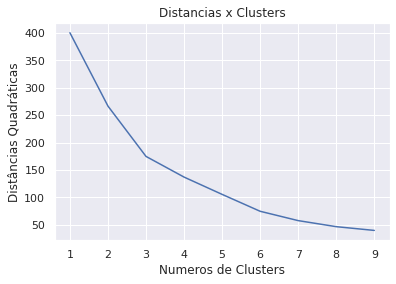

In [ ]:
sns.set()
plt.plot(range(1,10),dq)
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title('Distancias x Clusters')
plt.xlabel('Numeros de Clusters')
plt.ylabel('Distâncias Quadráticas')
plt.show()

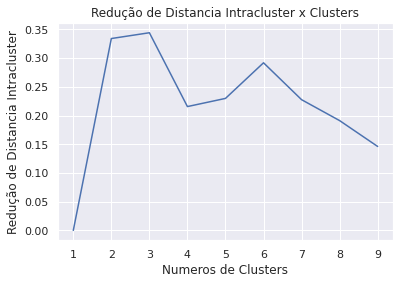

In [ ]:
sns.set()
plt.plot(range(1,10),ev)
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title('Redução de Distancia Intracluster x Clusters')
plt.xlabel('Numeros de Clusters')
plt.ylabel('Redução de Distancia Intracluster')
plt.show()

## Se eu tenho uma distancia 10 com 2 clusters e 7 com 3 significa que eu reduzi a distancia intracluster em 30%

O Calinski Harabraz mede a relação da dispersão intracluster com a dispersão intercluster, nesse caso buscamos o maior crescimento desse indice a medida que aumentamos o numero de clusters

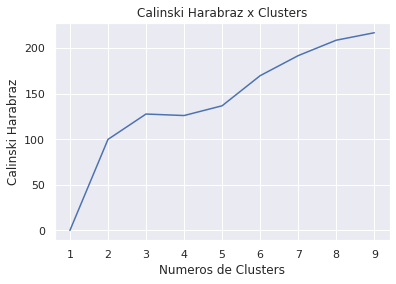

In [ ]:
sns.set()
plt.plot(range(1,10),ch)
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title('Calinski Harabraz x Clusters')
plt.xlabel('Numeros de Clusters')
plt.ylabel('Calinski Harabraz')
plt.show()

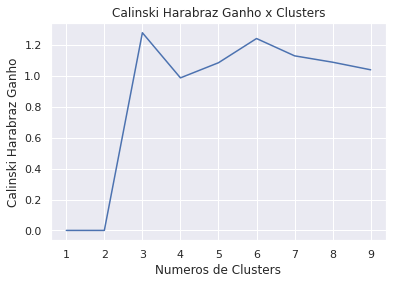

In [ ]:
sns.set()
plt.plot(range(1,10),chGanho)
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title('Calinski Harabraz Ganho x Clusters')
plt.xlabel('Numeros de Clusters')
plt.ylabel('Calinski Harabraz Ganho')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, 
                random_state=0, 
                max_iter = 300)
kmeans.fit(dfNorm[['Taxa de Crescimento PIB','PIB per Capita']])
kmeans.labels_

array([1, 1, 4, 1, 0, 4, 3, 4, 4, 3, 0, 0, 1, 3, 4, 1, 4, 1, 0, 4, 1, 2,
       4, 4, 1, 4, 1, 0, 4, 1, 1, 4, 1, 1, 0, 2, 1, 1, 4, 1, 4, 1, 1, 4,
       4, 1, 4, 4, 3, 0, 4, 0, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 0, 0, 4,
       1, 1, 4, 0, 1, 4, 0, 4, 0, 1, 1, 1, 5, 1, 4, 0, 4, 0, 4, 1, 1, 4,
       2, 0, 0, 4, 0, 1, 1, 1, 1, 0, 4, 4, 4, 1, 4, 3, 4, 1, 3, 1, 2, 3,
       4, 1, 4, 3, 1, 0, 1, 1, 4, 4, 1, 4, 2, 4, 4, 4, 1, 1, 4, 1, 1, 0,
       0, 1, 1, 1, 4, 0, 1, 1, 4, 3, 1, 1, 4, 4, 1, 4, 0, 0, 1, 1, 1, 1,
       0, 1, 4, 1, 1, 4, 1, 0, 4, 0, 1, 1, 4, 4, 1, 4, 3, 4, 1, 4, 0, 2,
       1, 1, 4, 1, 1, 1, 4, 4, 1, 3, 1, 1, 1, 0, 0, 0, 4, 1, 4, 1, 0, 4,
       4, 1, 4], dtype=int32)

#Resultados experimentais e análise

In [ ]:
dfNorm['Cluster'] = kmeans.labels_
dfIndicadores['Cluster'] = kmeans.labels_

In [ ]:
dfNorm.head(10)

,País,Sigla,PIB,Taxa de Crescimento PIB,PIB per Capita,Cluster
0,Afghanistan,AFG,-0.421258,0.339466,-0.659903,1
1,Albania,ALB,-0.421292,0.198564,-0.454185,1
2,Algeria,DZA,-0.420416,-0.003437,-0.540707,4
3,American Samoa,ASM,-0.421389,1.121286,-0.133236,1
4,Andorra,AND,-0.421374,-0.761564,0.916489,0
5,Angola,AGO,-0.059834,-0.053314,-0.612283,4
6,Antigua and Barbuda,ATG,-0.421385,-1.885040,-0.084199,3
7,Argentina,ARG,2.205665,-0.601959,-0.315192,4
8,Armenia,ARM,-0.336153,-0.290229,-0.499732,4
9,Aruba,ABW,-0.421377,-2.150634,0.317015,3


In [ ]:
dfIndicadores.head(10)

,País,Sigla,PIB,Taxa de Crescimento PIB,PIB per Capita,Cluster
0,Afghanistan,AFG,2.011614e+10,-2.35,516.75,1
1,Albania,ALB,1.513187e+10,-3.48,5332.16,1
2,Algeria,DZA,1.450092e+11,-5.10,3306.86,4
3,American Samoa,ASM,7.090000e+08,3.92,12844.90,1
4,Andorra,AND,2.891001e+09,-11.18,37416.70,0
5,Angola,AGO,5.361907e+13,-5.50,1631.43,4
6,Antigua and Barbuda,ATG,1.370281e+09,-20.19,13992.74,3
7,Argentina,ARG,3.895910e+14,-9.90,8585.69,4
8,Armenia,ARM,1.264121e+13,-7.40,4266.02,4
9,Aruba,ABW,2.496648e+09,-22.32,23384.30,3


In [ ]:
# fig = px.scatter(dfNorm, 
#                  x="PIB per Capita", 
#                  y = "Taxa de Crescimento PIB", 
#                  color = 'Cluster',
#                  hover_name="País", 
#                  log_x=True, size_max=100, 
#                  symbol = 'Cluster',
#                  title="Dispersão de Países por PIB Per Capita e Taxa de Crescimento do PIB")
# fig.show()

In [ ]:
fig = px.scatter(dfIndicadores, 
                 x="PIB per Capita", 
                 y = "Taxa de Crescimento PIB", 
                 #Discretizar a variável para as cores ficarem mais "distintas"
                 color = dfIndicadores['Cluster'].astype(str),
                 hover_name="País", 
                 log_x=True, 
                 size_max=100, 
                 title="Dispersão de Países por PIB Per Capita e Taxa de Crescimento do PIB")
fig.show()

# Avaliação

In [ ]:
dfPerCapita = dfIndicadores[['Cluster', 'PIB per Capita']].copy()
dfCrescimento = dfIndicadores[['Cluster', 'Taxa de Crescimento PIB']].copy()

In [ ]:
# dfPerCapita.sample(5)

In [ ]:
# dfCrescimento.sample(5)

In [ ]:
# dfPerCapita.sample(5)

In [ ]:
# dfCrescimento.sample(5)

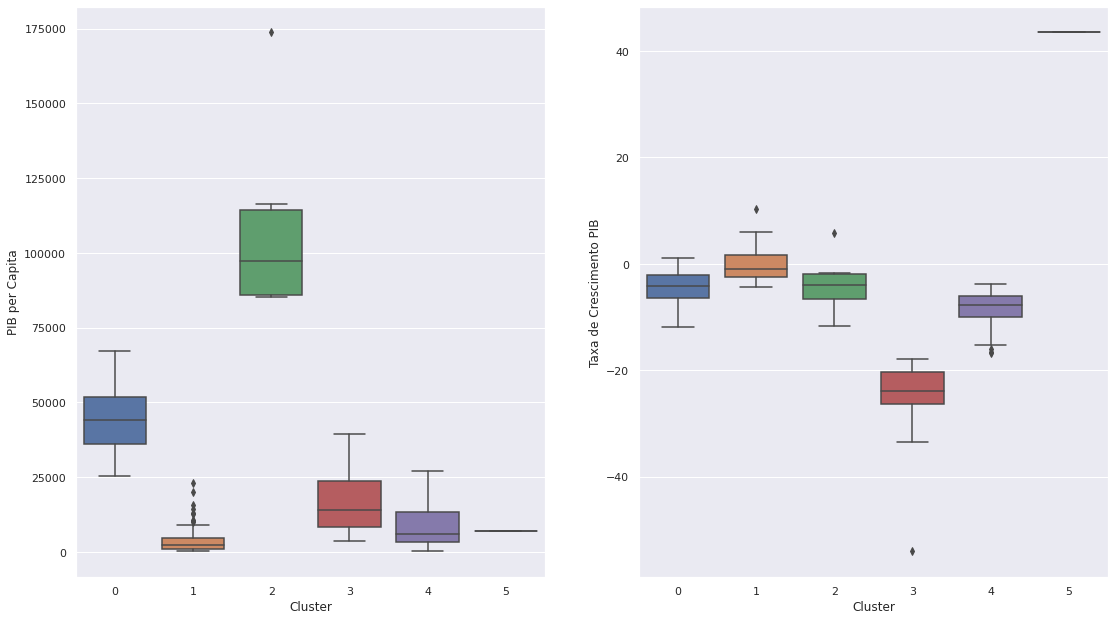

In [ ]:
fig, ax = plt.subplots(1,2)

sns.boxplot(x= dfPerCapita['Cluster'], 
            y = dfPerCapita['PIB per Capita'], 
            ax=ax[0]
            )

sns.boxplot(x= dfCrescimento['Cluster'], 
            y = dfCrescimento['Taxa de Crescimento PIB'], 
            ax=ax[1]
            )

fig.set_size_inches(18.5, 10.5)
fig.show()

##### O agrupamento segue algum padrão continental? isto é financeiramente falando os países de mesmo continente estão no mesmo "patamar" e em subregioes?

In [ ]:
#dfContinentes.sample(5)

In [ ]:
dfNorm = pd.merge(dfNorm,dfContinentes, how = "inner")
dfNorm.shape

(200, 8)

In [ ]:
dfIndicadores = pd.merge(dfIndicadores,dfContinentes, how = "inner")
dfIndicadores.shape

(200, 8)

Mantem a mesma quantidade de países antes do Join, achou correspondencia pra todos

In [ ]:
#dfIndicadores.sample(5)

In [ ]:
dfAgg = (
    dfIndicadores[['Continente','Cluster','País']]
    .groupby(['Continente','Cluster'])
    .count()
    .reset_index()
    .sort_values('Continente', ascending = True)

)
dfAgg

,Continente,Cluster,País
0,Africa,1,37
1,Africa,3,1
2,Africa,4,14
3,Americas,0,5
4,Americas,1,5
5,Americas,2,2
6,Americas,3,7
7,Americas,4,22
8,Americas,5,1
12,Asia,4,15


In [ ]:
fig = px.scatter(dfIndicadores, 
                 x="Taxa de Crescimento PIB", 
                 y = "Cluster", 
                 color = 'Continente',
                 hover_name="País", 
                 log_x=False, size_max=100, 
                 title="Dispersão de Países por Taxa de Crescimento PIB e Cluster")
fig.show()


In [ ]:
fig = px.scatter(dfIndicadores, 
                 x="PIB per Capita", 
                 y = "Cluster", 
                 color = 'Continente',
                 hover_name="País", 
                 log_x=True, size_max=100, 
                 title="Dispersão de Países por PIB Per Capita e Cluster")
fig.show()

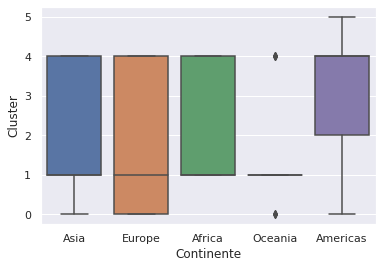

In [ ]:
sns.boxplot(x= dfIndicadores['Continente'], 
            y = dfIndicadores['Cluster'], 
            )

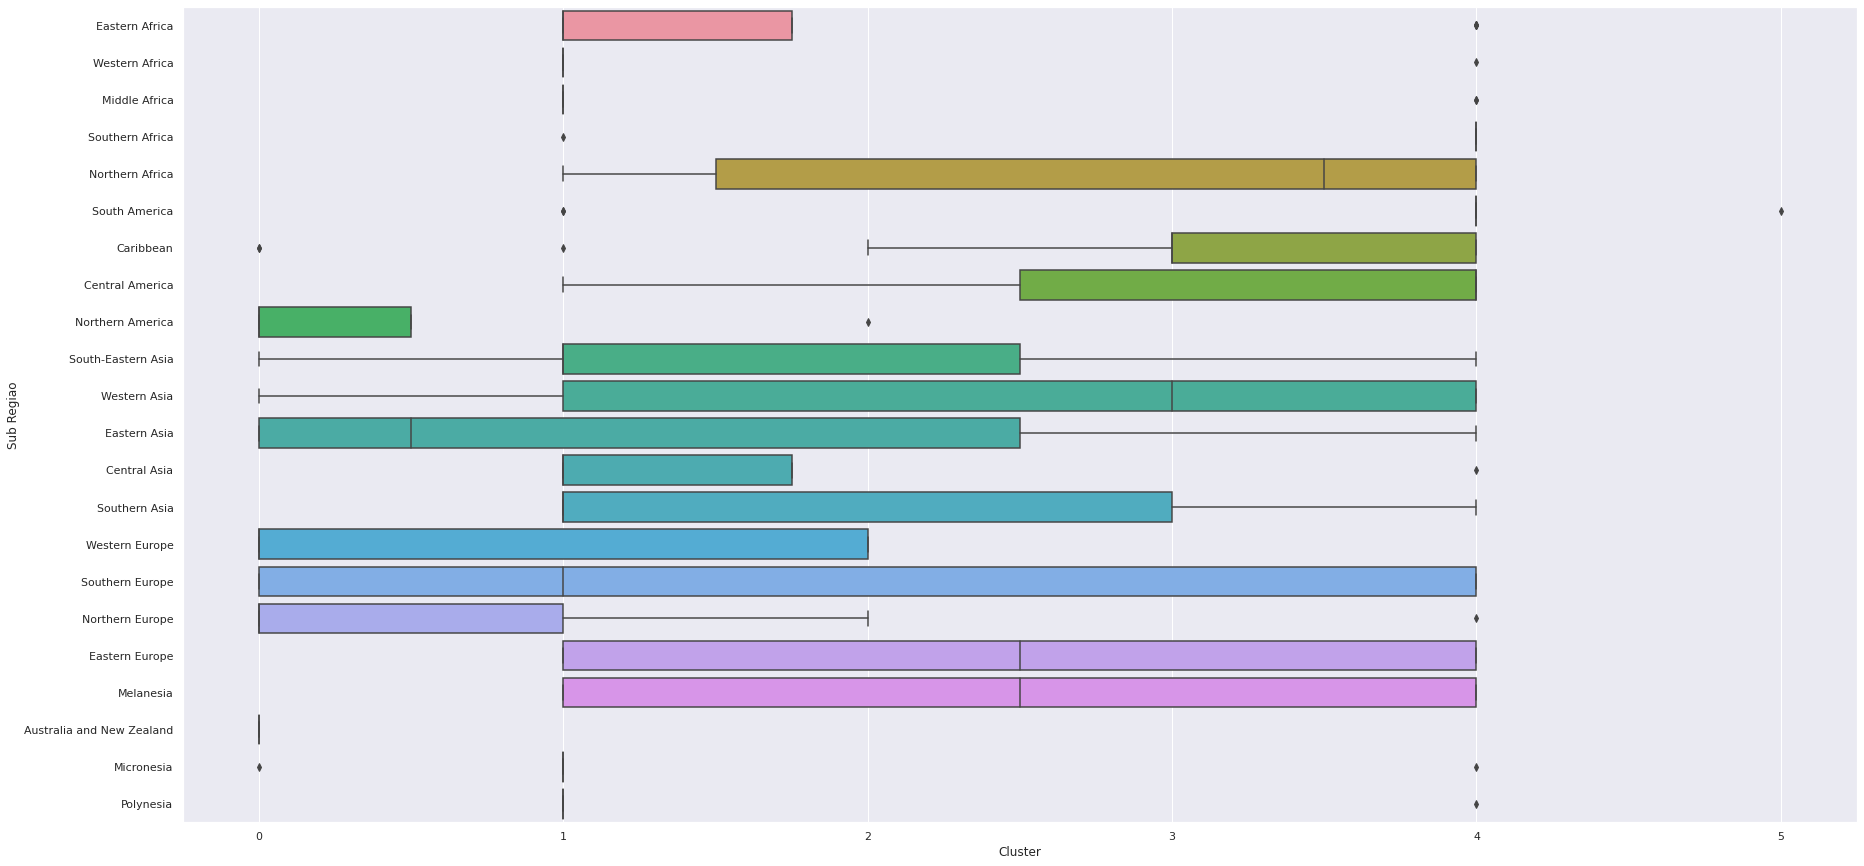

In [ ]:
#Altera o tamanho dos gráficos por conta do boxplot
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x = dfIndicadores['Cluster'], 
            y= dfIndicadores.sort_values('Continente', ascending = True)['Sub Regiao'], 
            )
#Retorna os gráficos ao tamanho padrão
sns.set(rc={'figure.figsize':(6.4,4.8)})

In [ ]:
for continente in dfIndicadores['Continente'].unique():
  fig = px.scatter(dfIndicadores.loc[dfIndicadores['Continente'] == continente], 
                  x="Taxa de Crescimento PIB", 
                  y = "Cluster", 
                  color = 'Sub Regiao',
                  hover_name="País", 
                  log_x=False, size_max=100, 
                  title="Dispersão de Países do continente {} por Taxa de Crescimento PIB e Cluster" .format(continente))
  fig.show()

In [ ]:
for continente in dfIndicadores['Continente'].unique():
  fig = px.scatter(dfIndicadores.loc[dfIndicadores['Continente'] == continente], 
                  x="PIB per Capita", 
                  y = "Cluster", 
                  color = 'Sub Regiao',
                  hover_name="País", 
                  log_x=True, size_max=100, 
                  title="Dispersão de Países do continente {} por PIB Per Capita e Cluster" .format(continente))
  fig.show()

Silhuotte Coeficient: Mede a diferença entre a distancia media dos pontos de um cluster aos pontos do cluster mais próximo em relação a distância média intracluster
- Se próximo a 1 o ponto está bem proximo aos de seu cluster
- Se próximo a 0 o ponto está próximo a fronteira
- Se próximo a -1 o ponto está bem próximo aos de outro cluster indicando que o agrupamento pode apresentar erro

In [ ]:
#Calcula o Silhouette Coeficient
metrics.silhouette_score(dfNorm[['Taxa de Crescimento PIB','PIB per Capita']],dfNorm['Cluster'])

0.45344933432821877